In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn import svm, metrics
import pickle


In [31]:
# Load the dataset
df = pd.read_csv("/home/hgidea/Desktop/Coding/Python/internship/mentorness/ml_2/FastagFraudDetection.csv")


In [32]:
# Drop duplicates and missing values
df = df.drop_duplicates().dropna()

In [33]:
# Extract time-based features
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Month'] = df['Timestamp'].dt.month
df['Week'] = df['Timestamp'].dt.isocalendar().week

In [34]:
# Drop unnecessary columns
df = df.drop(columns=['Transaction_ID', 'FastagID', 'Vehicle_Plate_Number', 'Timestamp'])


In [35]:
# Define feature columns
features = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Type', 'TollBoothID',
            'Lane_Type', 'Vehicle_Dimensions', 'Geographical_Location',
            'Month', 'Week']

In [36]:
# Encode target variable
le = LabelEncoder()
df['Fraud_indicator'] = le.fit_transform(df['Fraud_indicator'])


In [37]:
# Define X and y
X = df[features]
y = df['Fraud_indicator']


In [38]:
# Define ColumnTransformer
column_trans = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first'), ['Vehicle_Type', 'TollBoothID', 'Lane_Type', 'Geographical_Location']),
    ('ordinal', OrdinalEncoder(), ['Vehicle_Dimensions'])
], remainder='passthrough')


In [39]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)


In [60]:
df.columns

Index(['Vehicle_Type', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions',
       'Transaction_Amount', 'Amount_paid', 'Geographical_Location',
       'Vehicle_Speed', 'Fraud_indicator', 'Month', 'Week'],
      dtype='object')

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [63]:
# Transform the features
X_train_transformed = column_trans.fit_transform(X_train)
X_test_transformed = column_trans.transform(X_test)

In [68]:
# Define models and their hyperparameters
models = {
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params': {'max_depth': [1, 3, 5, 7], 'criterion': ['gini', 'entropy']}
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {'max_depth': [2, 3, 5, 7], 'criterion': ['gini', 'entropy'], 'n_estimators': [100, 200, 300]}
    },
    'AdaBoostClassifier': {
        'model': AdaBoostClassifier(),
        'params': {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.01, 0.001]}
    },
    'XGBClassifier': {
        'model': XGBClassifier(),
        'params': {'max_depth': [2, 3, 5, 7], 'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.001]}
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [2, 3, 5, 7]}
    },
    'SVM': {
        'model': svm.SVC(probability=True),
        'params': {'C': [5, 10, 20, 30], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}
    }
}

In [69]:
# Evaluate each model using GridSearchCV
best_models = {}
for model_name in models:
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(models[model_name]['model'], models[model_name]['params'], cv=5, n_jobs=-1, scoring='f1_weighted')
    grid_search.fit(X_train_transformed, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best Cross-validation score for {model_name}: {grid_search.best_score_}")


Training DecisionTreeClassifier...
Best Parameters for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 7}
Best Cross-validation score for DecisionTreeClassifier: 0.9932131648566125
Training RandomForestClassifier...
Best Parameters for RandomForestClassifier: {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 200}
Best Cross-validation score for RandomForestClassifier: 0.9607693344452576
Training AdaBoostClassifier...
Best Parameters for AdaBoostClassifier: {'learning_rate': 0.1, 'n_estimators': 300}
Best Cross-validation score for AdaBoostClassifier: 0.9639573170890389
Training XGBClassifier...
Best Parameters for XGBClassifier: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best Cross-validation score for XGBClassifier: 0.9967805592764452
Training KNeighborsClassifier...
Best Parameters for KNeighborsClassifier: {'n_neighbors': 2}
Best Cross-validation score for KNeighborsClassifier: 0.9974242737273201
Training SVM...
Best Parameters for SVM: {'C': 20, '


Evaluating DecisionTreeClassifier...
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       287
           1       0.99      1.00      0.99      1049

    accuracy                           0.99      1336
   macro avg       0.99      0.98      0.98      1336
weighted avg       0.99      0.99      0.99      1336

[[ 275   12]
 [   2 1047]]
F1 Score: 0.9894529141885796
Accuracy: 0.9895209580838323
ROC AUC Score: 0.9939630575660244

Evaluating RandomForestClassifier...
              precision    recall  f1-score   support

           0       1.00      0.77      0.87       287
           1       0.94      1.00      0.97      1049

    accuracy                           0.95      1336
   macro avg       0.97      0.89      0.92      1336
weighted avg       0.95      0.95      0.95      1336

[[ 222   65]
 [   0 1049]]
F1 Score: 0.9489718249263172
Accuracy: 0.9513473053892215
ROC AUC Score: 0.9935694522408931

Evaluating AdaBoostClassifier..

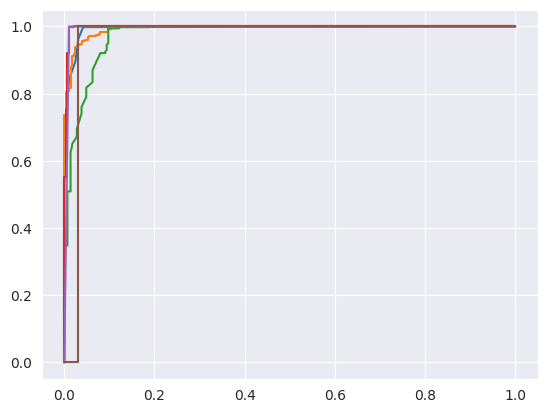

In [70]:
# Model Evaluation
for model_name, model in best_models.items():
    print(f"\nEvaluating {model_name}...")
    y_pred = model.predict(X_test_transformed)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_transformed)[:, 1])
    print(f'F1 Score: {f1}')
    print(f'Accuracy: {accuracy}')
    print(f'ROC AUC Score: {roc_auc}')
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_transformed)[:, 1])
    plt.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.2f})')


In [72]:
import pandas as pd

# Initialize an empty list to store the results
results = []

# Iterate over the best_models dictionary
for model_name, model in best_models.items():
    # Get the best cross-validation score
    best_score = cross_val_score(model, X_train_transformed, y_train, cv=5).mean()
    # Get the best parameters
    best_params = model.get_params()
    # Append the results to the list
    results.append({
        'Model': model_name,
        'Best Parameters': best_params,
        'Best Score': best_score
    })

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

                    Model                                    Best Parameters  \
0  DecisionTreeClassifier  {'ccp_alpha': 0.0, 'class_weight': None, 'crit...   
1  RandomForestClassifier  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...   
2      AdaBoostClassifier  {'algorithm': 'SAMME.R', 'base_estimator': 'de...   
3           XGBClassifier  {'objective': 'binary:logistic', 'base_score':...   
4    KNeighborsClassifier  {'algorithm': 'auto', 'leaf_size': 30, 'metric...   
5                     SVM  {'C': 20, 'break_ties': False, 'cache_size': 2...   

   Best Score  
0    0.993258  
1    0.958266  
2    0.965008  
3    0.996790  
4    0.997432  
5    0.993258  


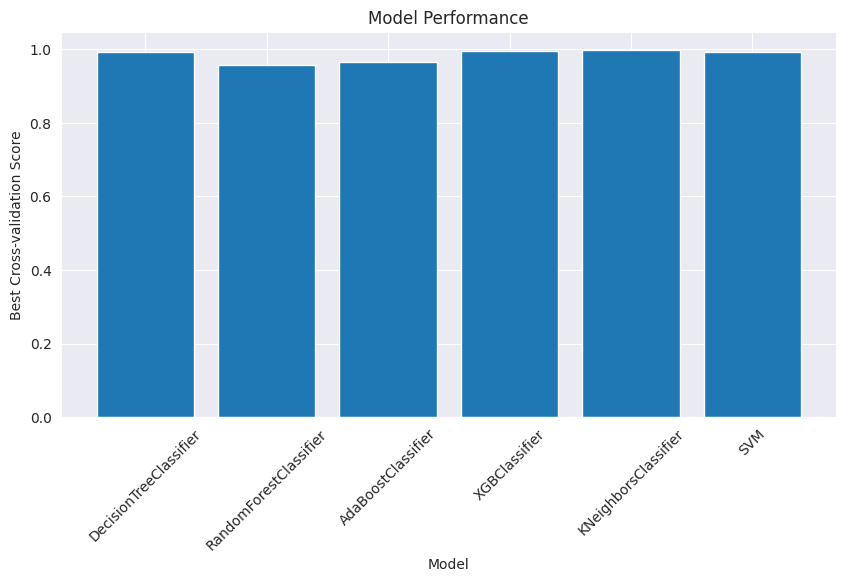

In [75]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 5))

# Create a bar plot of the best scores
plt.bar(results_df['Model'], results_df['Best Score'])

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Best Cross-validation Score')
plt.title('Model Performance')
# Tilt the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


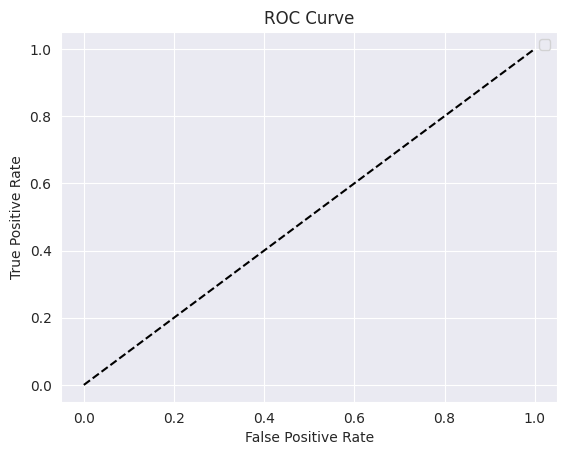

In [71]:
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

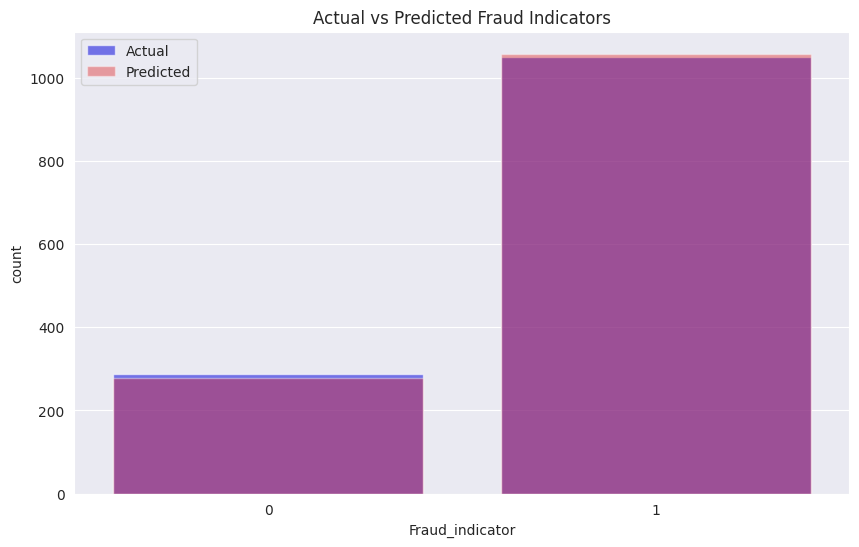

In [74]:
# Visualization: Predicted vs Actual
best_model = best_models['SVM']
y_pred_final = best_model.predict(X_test_transformed)

plt.figure(figsize=(10, 6))
sns.countplot(x=y_test, label='Actual', color='blue', alpha=0.6)
sns.countplot(x=y_pred_final, label='Predicted', color='red', alpha=0.4)
plt.legend()
plt.title('Actual vs Predicted Fraud Indicators')
plt.show()

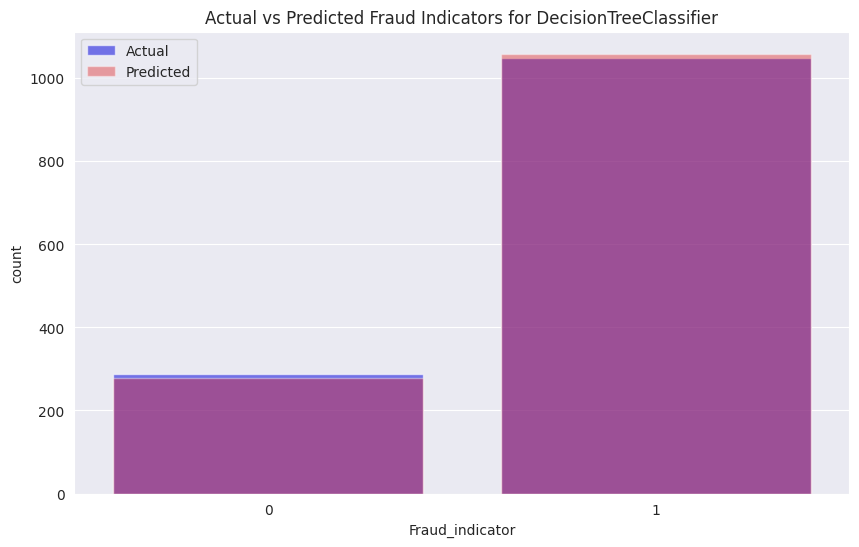

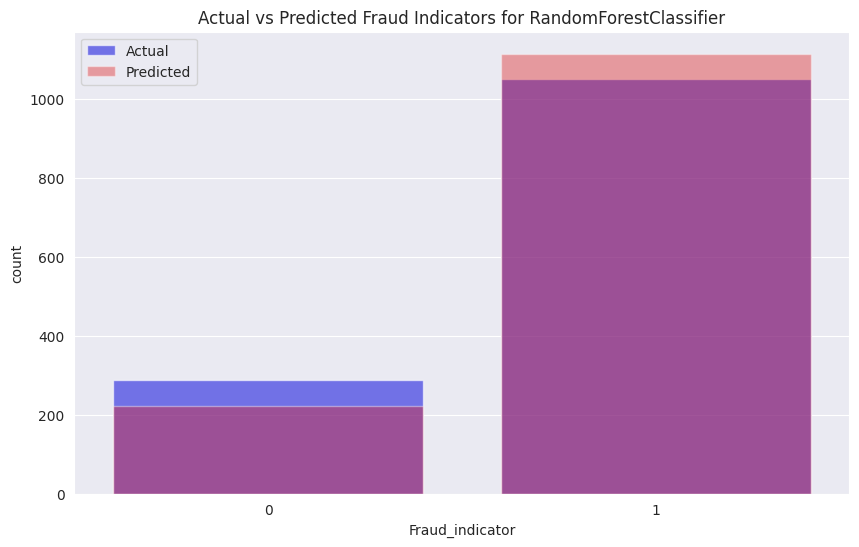

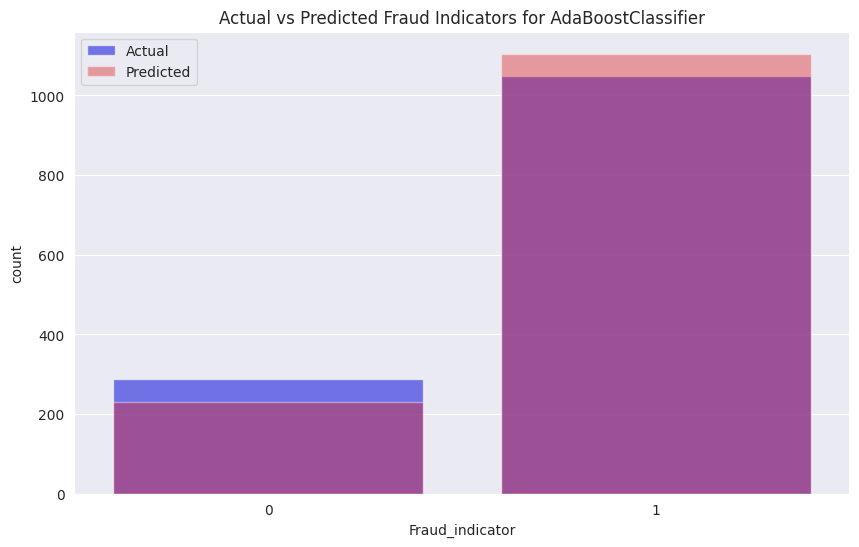

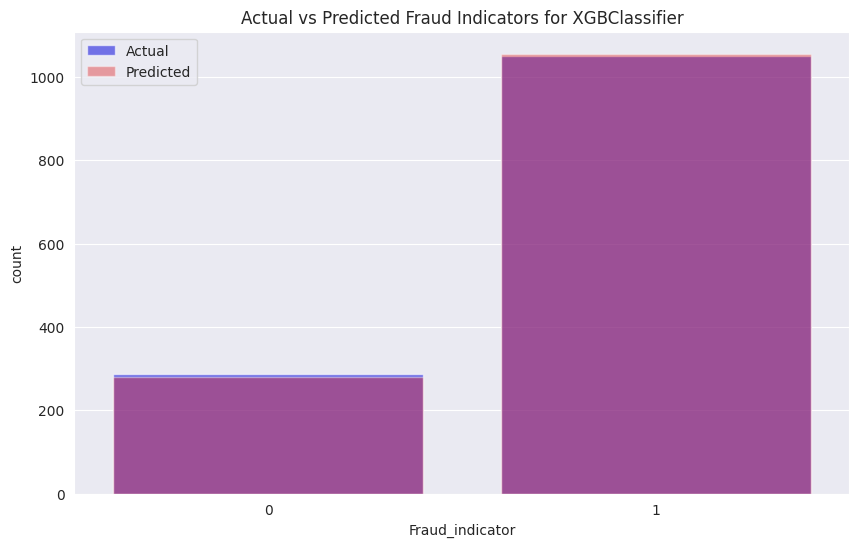

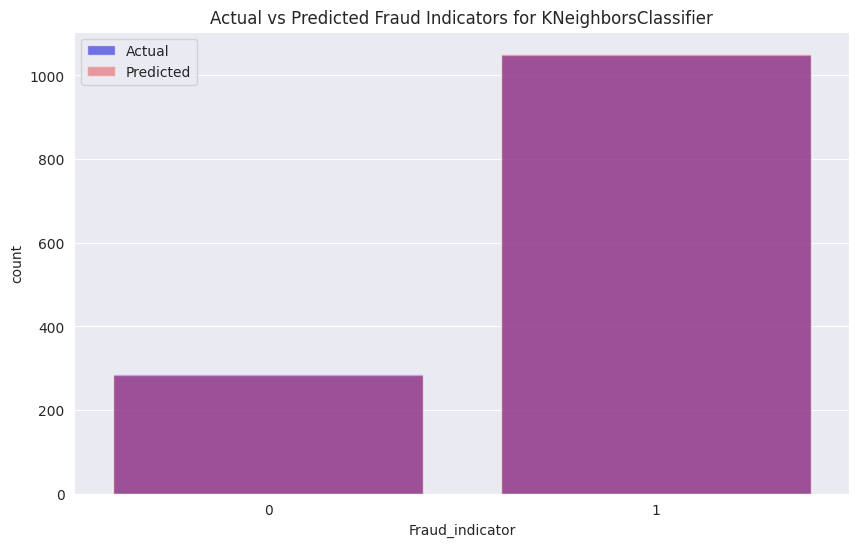

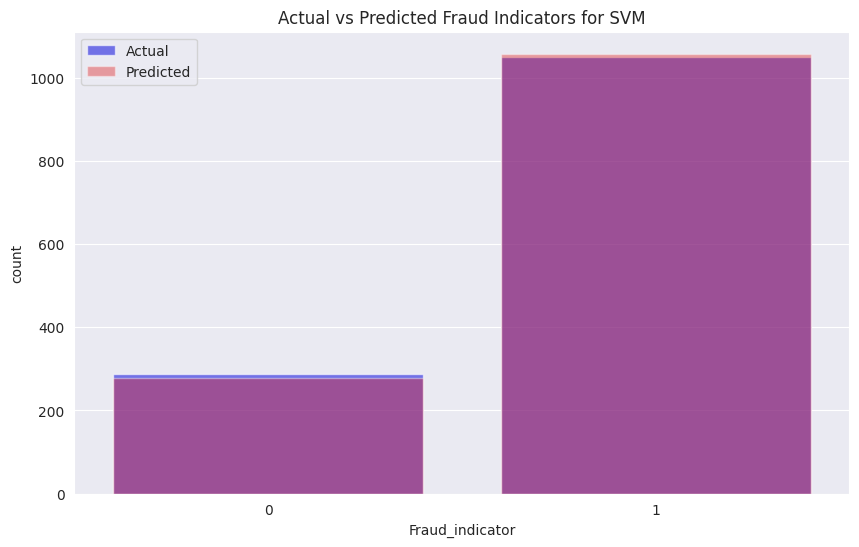

In [76]:
# Iterate over each model in the best_models dictionary
for model_name, model in best_models.items():
    # Generate predictions
    y_pred_final = model.predict(X_test_transformed)

    # Create a new figure for each model
    plt.figure(figsize=(10, 6))

    # Create countplots for actual and predicted values
    sns.countplot(x=y_test, label='Actual', color='blue', alpha=0.6)
    sns.countplot(x=y_pred_final, label='Predicted', color='red', alpha=0.4)

    # Add legend and title
    plt.legend()
    plt.title(f'Actual vs Predicted Fraud Indicators for {model_name}')

    # Display the plot
    plt.show()

In [40]:

# Define the model
model = svm.SVC(gamma='auto', C=5, kernel='poly')


In [41]:
# Create pipeline
pipe = make_pipeline(column_trans, model)

In [42]:
# Fit the model
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Vehicle_Type',
                                                   'TollBoothID', 'Lane_Type',
                                                   'Geographical_Location']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['Vehicle_Dimensions'])])),
                ('svc', SVC(C=5, gamma='auto', kernel='poly'))])

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Predict the test set results
y_pred = pipe.predict(X_test)

# Create a DataFrame from the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, 
                     index = ['Actual Negative', 'Actual Positive'], 
                     columns = ['Predicted Negative', 'Predicted Positive'])

# Print the confusion matrix in tabular format
print("Confusion Matrix:")
print(cm_df)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 287                   0
Actual Positive                   0                1049

Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       287
    Positive       1.00      1.00      1.00      1049

    accuracy                           1.00      1336
   macro avg       1.00      1.00      1.00      1336
weighted avg       1.00      1.00      1.00      1336



In [44]:
# Save the model
with open('SVM_Fast.pkl', 'wb') as f:
    pickle.dump(pipe, f)

In [45]:
# Load the model and make a prediction
def predict_fraud(input_data):
    with open('SVM_Fast.pkl', 'rb') as f:
        model = pickle.load(f)
    return model.predict(input_data)

In [46]:
# Example prediction
example_data = pd.DataFrame([[150, 100, 'Car', 'B-102', 'Regular', 'Small', '13.059816123454882, 77.77068662374292', 1, 1]],
                            columns=features)

In [52]:
print(predict_fraud(example_data))

[0]


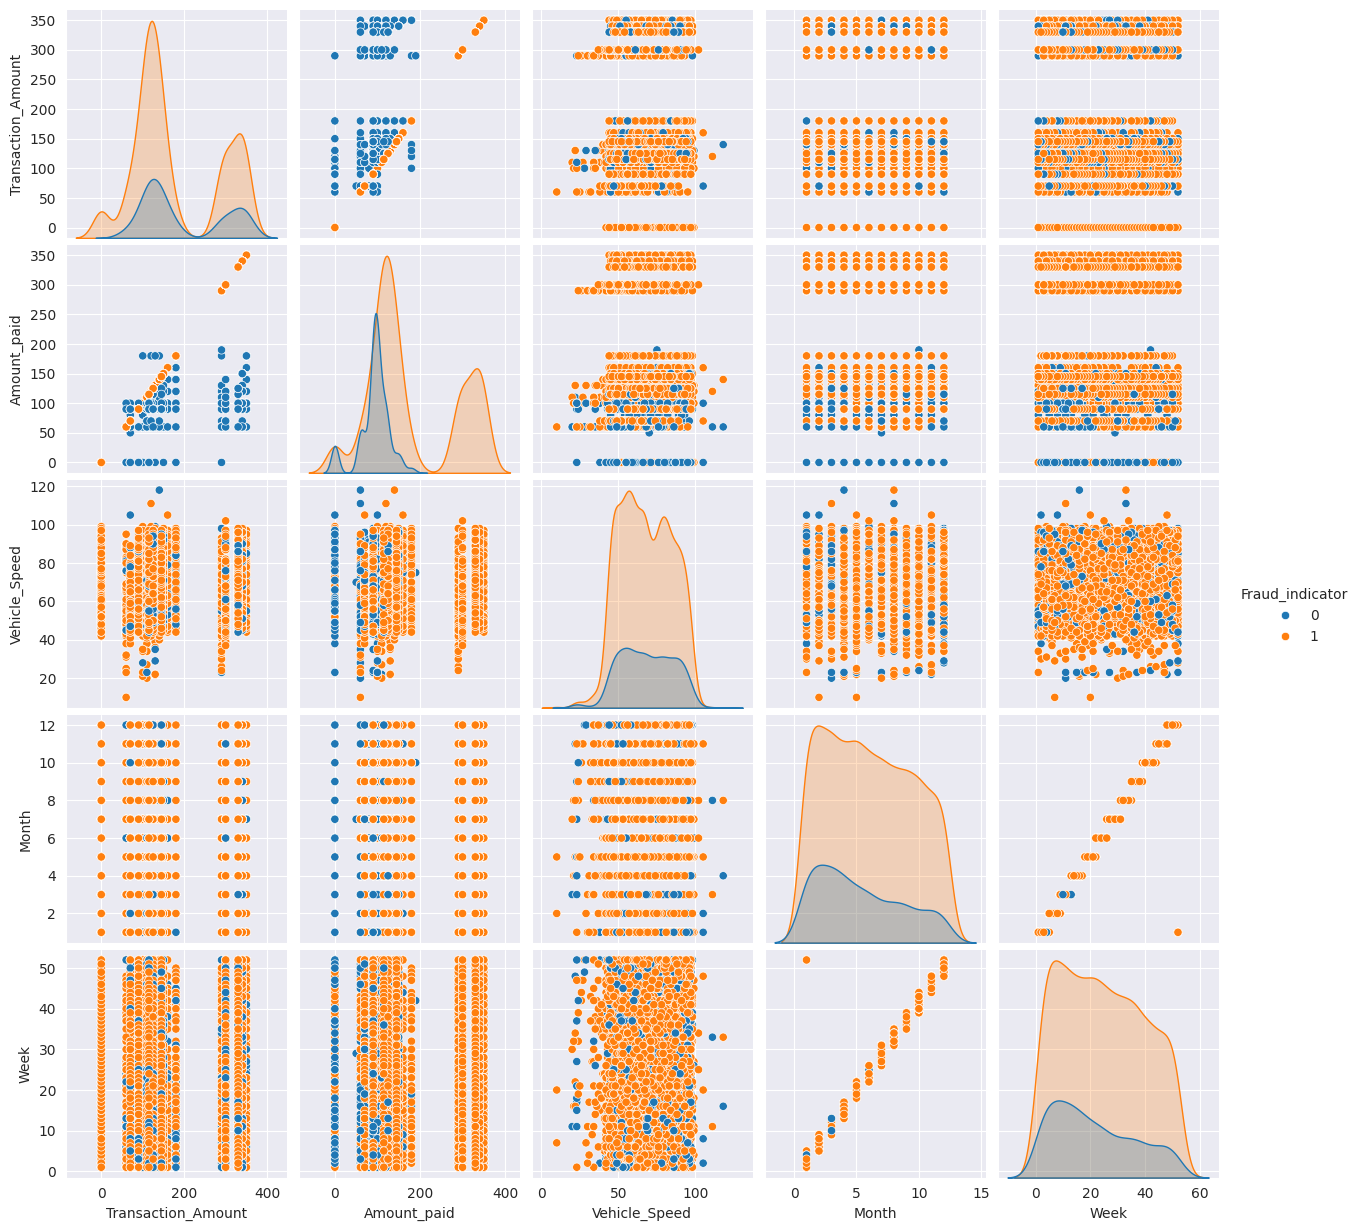

In [53]:
# Visualize the data
sns.pairplot(df, hue='Fraud_indicator')
plt.show()


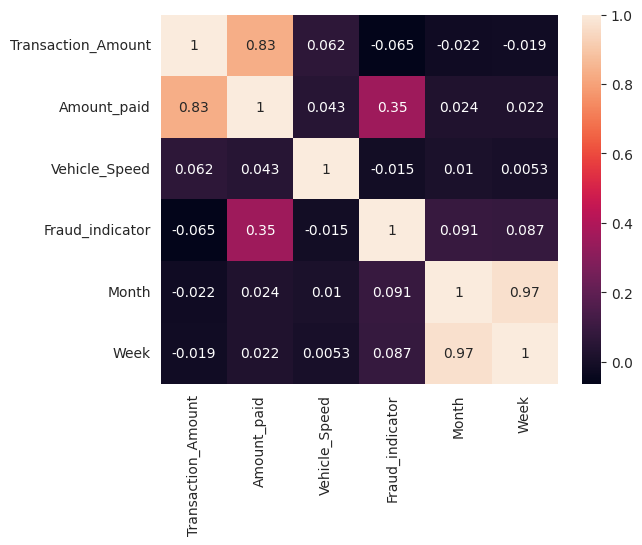

In [57]:
import numpy as np

# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Correlation heatmap
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

In [48]:
# Cross-validation
scores = cross_val_score(pipe, X, y, cv=5)
print(scores)


[1. 1. 1. 1. 1.]


In [49]:
# Hyperparameter tuning
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__gamma': ['scale', 'auto']
}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)


{'svc__C': 0.1, 'svc__gamma': 'auto', 'svc__kernel': 'poly'}
1.0


In [50]:
# Save the best model
with open('SVM_Fast_best.pkl', 'wb') as f:
    pickle.dump(grid.best_estimator_, f)

In [51]:
# Load the best model and make a prediction
def predict_fraud_best(input_data):
    with open('SVM_Fast_best.pkl', 'rb') as f:
        model = pickle.load(f)
    return model.predict(input_data)

In [98]:
# Create a sample input where Fraud_indicator is 1
sample_data = pd.DataFrame([[200, 150, 'Truck', 'C-103', 'Regular', 'Large', '13.059816123454882, 77.77068662374292', 9, 1]],
                            columns=features)

In [99]:
print(sample_data)

   Transaction_Amount  Amount_paid Vehicle_Type TollBoothID Lane_Type  \
0                 200          150        Truck       C-103   Regular   

  Vehicle_Dimensions                  Geographical_Location  Month  Week  
0              Large  13.059816123454882, 77.77068662374292      9     1  


In [100]:
# Predict the sample data
print(predict_fraud(sample_data))


[0]


In [101]:
# Load the dataset
testing = pd.read_csv("/home/hgidea/Desktop/Coding/Python/internship/mentorness/ml_2/FastagFraudDetection.csv")


In [102]:

# Preprocess the data in the same way as it was done while training
testing = testing.drop_duplicates().dropna()
testing['Timestamp'] = pd.to_datetime(testing['Timestamp'])
testing['Month'] = testing['Timestamp'].dt.month
testing['Week'] = testing['Timestamp'].dt.isocalendar().week
testing = testing.drop(columns=['Transaction_ID', 'FastagID', 'Vehicle_Plate_Number', 'Timestamp'])


In [103]:

# Define the feature columns
features = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Type', 'TollBoothID',
            'Lane_Type', 'Vehicle_Dimensions', 'Geographical_Location',
            'Month', 'Week']

# Define X
X = testing[features]



In [104]:
# Load the model
with open('SVM_Fast_best.pkl', 'rb') as f:
    model = pickle.load(f)



In [105]:
# Make predictions
predictions = model.predict(X)


In [106]:

# Print whether each transaction is a fraud or not
for i, prediction in enumerate(predictions):
    print(f'Transaction {i+1} is {"a fraud" if prediction == 1 else "not a fraud"}')

Transaction 1 is not a fraud
Transaction 2 is not a fraud
Transaction 3 is not a fraud
Transaction 4 is not a fraud
Transaction 5 is not a fraud
Transaction 6 is not a fraud
Transaction 7 is not a fraud
Transaction 8 is not a fraud
Transaction 9 is not a fraud
Transaction 10 is not a fraud
Transaction 11 is not a fraud
Transaction 12 is a fraud
Transaction 13 is not a fraud
Transaction 14 is not a fraud
Transaction 15 is not a fraud
Transaction 16 is not a fraud
Transaction 17 is a fraud
Transaction 18 is not a fraud
Transaction 19 is a fraud
Transaction 20 is not a fraud
Transaction 21 is not a fraud
Transaction 22 is a fraud
Transaction 23 is not a fraud
Transaction 24 is not a fraud
Transaction 25 is a fraud
Transaction 26 is a fraud
Transaction 27 is a fraud
Transaction 28 is not a fraud
Transaction 29 is a fraud
Transaction 30 is not a fraud
Transaction 31 is a fraud
Transaction 32 is not a fraud
Transaction 33 is a fraud
Transaction 34 is not a fraud
Transaction 35 is not a fraud

In [107]:
# Save the predictions to a CSV file
testing['Fraud_indicator'] = predictions

testing.to_csv('predictions.csv', index=False)

In [109]:
# Load the original dataset
original_df = pd.read_csv("/home/hgidea/Desktop/Coding/Python/internship/mentorness/ml_2/FastagFraudDetection.csv")


In [110]:
# Preprocess the original dataset in the same way as it was done while training
original_df = original_df.drop_duplicates().dropna()
original_df['Timestamp'] = pd.to_datetime(original_df['Timestamp'])
original_df['Month'] = original_df['Timestamp'].dt.month
original_df['Week'] = original_df['Timestamp'].dt.isocalendar().week

In [111]:
original_df = original_df.drop(columns=['Transaction_ID', 'FastagID', 'Vehicle_Plate_Number', 'Timestamp'])


In [112]:
# Load the predicted results
predicted_df = pd.read_csv('/home/hgidea/Desktop/Coding/Python/internship/mentorness/ml_2/predictions.csv')

In [113]:
# Compare the 'Fraud_indicator' column in the original dataset with the 'Fraud_indicator' column in the predicted results
comparison_df = pd.DataFrame({
    'Actual': original_df['Fraud_indicator'],
    'Predicted': predicted_df['Fraud_indicator']
})

In [123]:
# Display the comparison DataFrame
print(comparison_df.head(50))

       Actual  Predicted
0       Fraud        0.0
1       Fraud        0.0
2         NaN        0.0
3       Fraud        0.0
4       Fraud        0.0
5       Fraud        0.0
6       Fraud        0.0
7       Fraud        0.0
8       Fraud        0.0
9         NaN        0.0
10      Fraud        0.0
11      Fraud        1.0
12      Fraud        0.0
13  Not Fraud        0.0
14      Fraud        0.0
15      Fraud        0.0
16        NaN        1.0
17      Fraud        0.0
18      Fraud        1.0
19  Not Fraud        0.0
20      Fraud        0.0
21  Not Fraud        1.0
22      Fraud        0.0
23        NaN        0.0
24      Fraud        1.0
25  Not Fraud        1.0
26      Fraud        1.0
27      Fraud        0.0
28  Not Fraud        1.0
29  Not Fraud        0.0
30        NaN        1.0
31  Not Fraud        0.0
32      Fraud        1.0
33  Not Fraud        0.0
34      Fraud        0.0
35  Not Fraud        1.0
36      Fraud        0.0
37        NaN        0.0
38  Not Fraud        0.0


In [130]:
# Calculate the accuracy of the model
accuracy = (comparison_df['Actual'] == comparison_df['Predicted']).mean()
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.54


In [135]:
from sklearn.metrics import confusion_matrix as cm

# Drop rows with NaN values in 'Actual' and 'Predicted' columns
comparison_df = comparison_df.dropna(subset=['Actual', 'Predicted'])

# Calculate the confusion matrix
confusion_mat = cm(comparison_df['Actual'], comparison_df['Predicted'])
cm_df = pd.DataFrame(confusion_mat, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print(cm_df)

                 Predicted Negative  Predicted Positive
Actual Negative                 236                 669
Actual Positive                 650                2425


In [137]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE



In [138]:
# Handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_transformed, y_train)

# Define the model
model = RandomForestClassifier(random_state=42)


In [139]:

# Define the parameters for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [2, 3, 5, 7, 9],
    'criterion': ['gini', 'entropy']
}


In [140]:

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_res, y_res)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 7, 9],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [141]:

# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


Best Parameters: {'criterion': 'gini', 'max_depth': 9, 'n_estimators': 200}
Best Score: 0.9880154606134676


In [142]:

# Use the best estimator for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_transformed)


In [143]:

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       287
           1       0.97      1.00      0.99      1049

    accuracy                           0.98      1336
   macro avg       0.99      0.95      0.96      1336
weighted avg       0.98      0.98      0.98      1336



In [145]:

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')



Accuracy: 0.98


In [146]:
# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test_transformed)[:, 1])
print(f'ROC AUC Score: {roc_auc:.2f}')



ROC AUC Score: 1.00


In [147]:
# Save the best model
with open('RandomForest_Fast.pkl', 'wb') as f:
    pickle.dump(best_model, f)
    


In [148]:
# Load the best model and make a prediction
def predict_fraud_rf(input_data):
    with open('RandomForest_Fast.pkl', 'rb') as f:
        model = pickle.load(f)
    return model.predict(input_data)


In [149]:
# Example prediction
example_data = pd.DataFrame([[150, 100, 'Car', 'B-102', 'Regular', 'Small', '13.059816123454882, 77.77068662374292', 1, 1]],
                            columns=features)

In [151]:
# Preprocess the example_data
example_data_transformed = column_trans.transform(example_data)

# Make prediction
print(predict_fraud_rf(example_data_transformed))

[0]


In [152]:
# Make predictions on the test data
y_pred = best_model.predict(X_test_transformed)

In [153]:
# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

In [154]:
# Save the DataFrame to a CSV file
results_df.to_csv('/home/hgidea/Desktop/Coding/Python/internship/mentorness/ml_2/model_predictions.csv', index=False)


In [155]:
# Load the original data
original_df = pd.read_csv("/home/hgidea/Desktop/Coding/Python/internship/mentorness/ml_2/FastagFraudDetection.csv")

In [156]:
# Compare the 'Actual' column in the original data with the 'Predicted' column in the predictions
comparison_df = pd.DataFrame({
    'Original': original_df['Fraud_indicator'],  # Replace 'target_column' with the name of your target column
    'Predicted': results_df['Predicted']
})

In [159]:
# Display the comparison DataFrame
print(comparison_df.head(50))



     Original  Predicted
0       Fraud        0.0
1       Fraud        NaN
2   Not Fraud        NaN
3       Fraud        0.0
4       Fraud        0.0
5       Fraud        NaN
6       Fraud        1.0
7       Fraud        NaN
8       Fraud        0.0
9   Not Fraud        NaN
10      Fraud        NaN
11      Fraud        0.0
12      Fraud        NaN
13  Not Fraud        NaN
14      Fraud        0.0
15      Fraud        NaN
16  Not Fraud        NaN
17      Fraud        NaN
18      Fraud        NaN
19  Not Fraud        NaN
20      Fraud        NaN
21  Not Fraud        NaN
22      Fraud        NaN
23  Not Fraud        NaN
24      Fraud        NaN
25  Not Fraud        NaN
26      Fraud        NaN
27      Fraud        NaN
28  Not Fraud        NaN
29  Not Fraud        NaN
30  Not Fraud        NaN
31  Not Fraud        1.0
32      Fraud        NaN
33  Not Fraud        1.0
34      Fraud        NaN
35  Not Fraud        1.0
36      Fraud        NaN
37  Not Fraud        NaN
38  Not Fraud        1.0


In [160]:

# Calculate the accuracy of the model
accuracy = (comparison_df['Original'] == comparison_df['Predicted']).mean()
print(f'Accuracy: {accuracy:.2f}')



Accuracy: 0.00
